In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel("data/1.xlsx", skiprows=1)

df.head()

,Exposure time,Environment,weight,corossion rate
0,1,1,20.8000,0.000000
1,1,2,20.8000,0.000000
2,1,3,20.8000,0.000000
3,30,1,20.6521,0.024297
4,30,2,20.5900,0.024297


PairGrid Plot

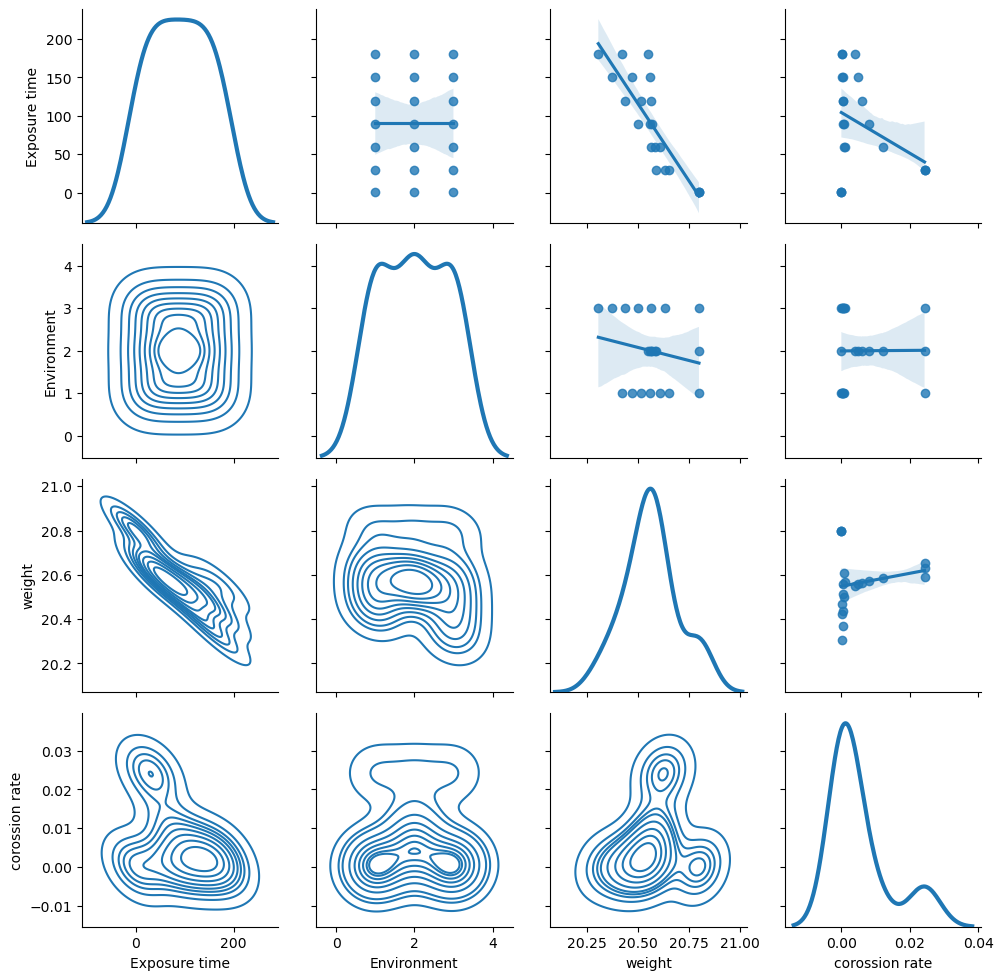

In [8]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3)
g.map_upper(sns.regplot)

PairPlot

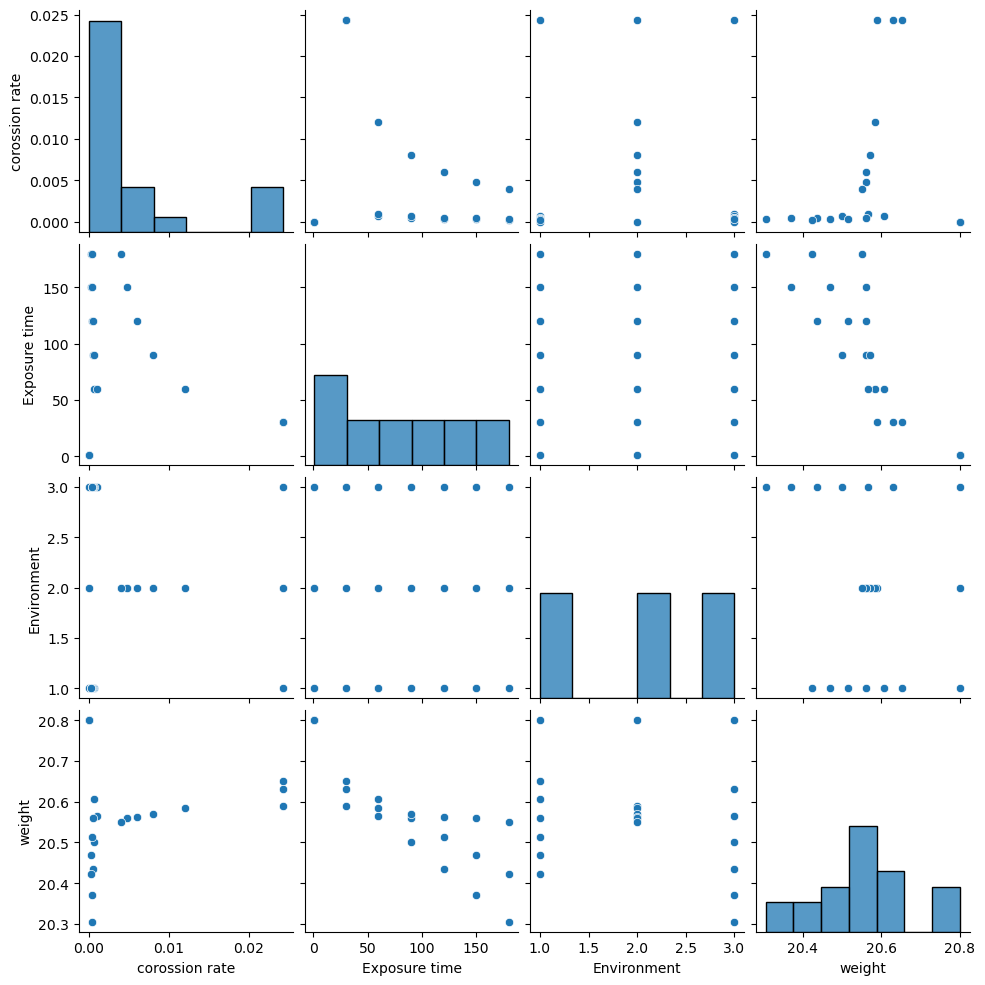

In [10]:
# Select the target variable and input features
target = df.columns[-1]
input_features = df.columns[:-1]

# Combine the target variable and input features into a single DataFrame
pairplot_data = pd.concat([df[target], df[input_features]], axis=1)

# Create a pairplot
sns.pairplot(pairplot_data, kind='scatter')
plt.show()

Correlation Heatmap

<AxesSubplot: >

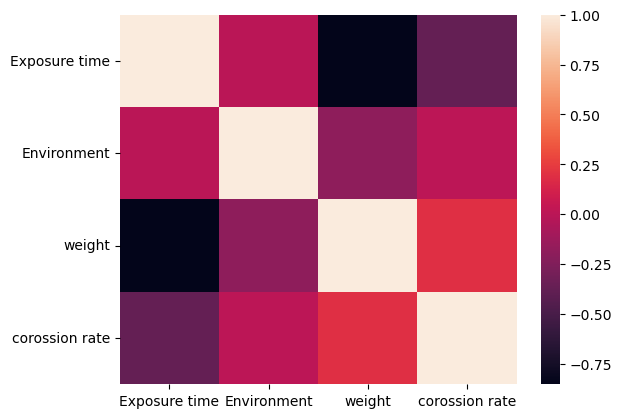

In [4]:
# corr = df.select_dtypes('number').drop(columns=df.columns[-1]).corr()
corr = df.select_dtypes('number').corr()

sns.heatmap(corr)

In [3]:
df_2 = pd.read_excel("data/2.xlsx", skiprows=1)

df_2.head()

,Exposure time,Environment,weight,hardness
0,1,1,20.8000,0.000
1,1,2,20.8000,0.000
2,1,3,20.8000,0.000
3,30,1,20.6521,345.287
4,30,2,20.5900,356.313


pairGrid Plot

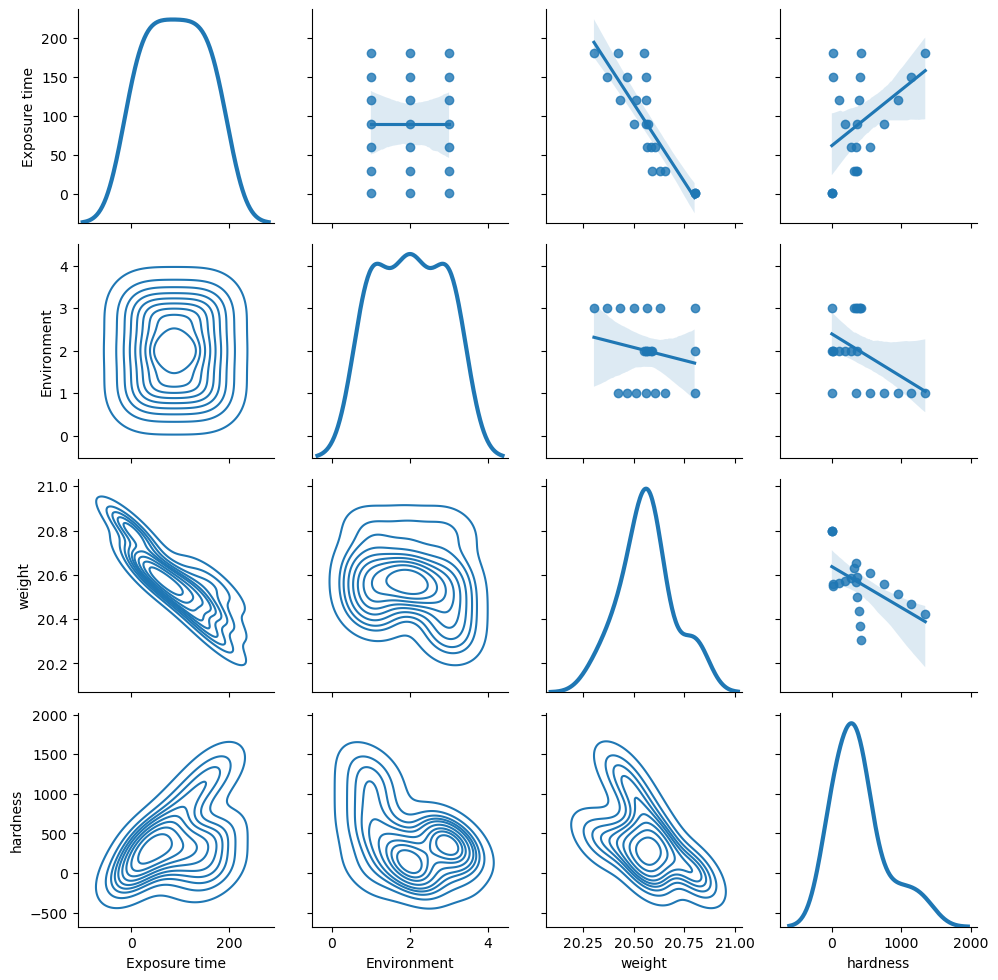

In [9]:
g = sns.PairGrid(df_2, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3)
g.map_upper(sns.regplot)

Pairplot

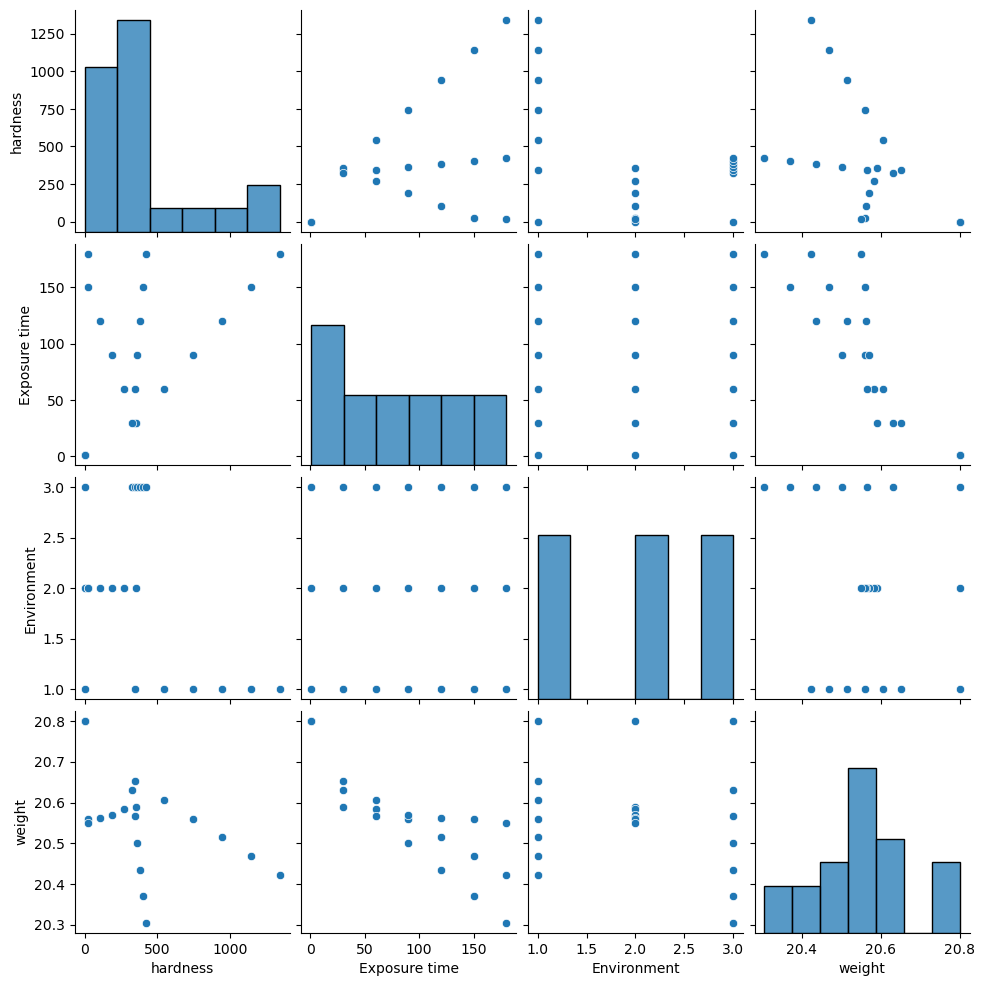

In [12]:
# Select the target variable and input features
target = df_2.columns[-1]
input_features = df_2.columns[:-1]

# Combine the target variable and input features into a single DataFrame
pairplot_data = pd.concat([df_2[target], df_2[input_features]], axis=1)

# Create a pairplot
sns.pairplot(pairplot_data, kind='scatter')
plt.show()

Correlation Heatmap

<AxesSubplot: >

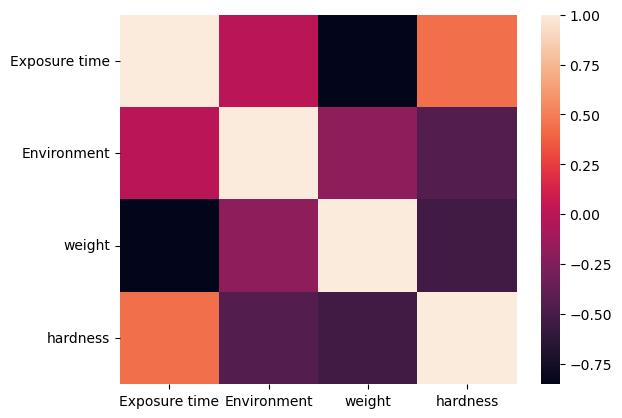

In [5]:
# corr = df_2.select_dtypes('number').drop(columns=df_2.columns[-1]).corr()
corr = df_2.select_dtypes('number').corr()

sns.heatmap(corr)

In [59]:
df = pd.read_excel("data/_2.xlsx")

df.head()

,Ash Content (%),Moisture Content (%),Volatile (%),Fixed Carbon (%),Calorific Value (MJ/Kg)
0,13.00,10.9,67.28,19.72,12.00
1,12.86,11. 08,66.95,20.00,11.92
2,13.04,11.1,67.27,19.69,12.01
3,13.02,10.9,67.20,19.70,12.00
4,12.89,10. 92,66.97,20.00,11.90


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ash Content (%)          44 non-null     float64
 1   Moisture Content (%)     44 non-null     object 
 2   Volatile (%)             44 non-null     float64
 3   Fixed Carbon (%)         44 non-null     float64
 4   Calorific Value (MJ/Kg)  44 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [61]:
df['Moisture Content (%)'] = df.apply(lambda x: x['Moisture Content (%)'].replace(' ', '') if isinstance(x['Moisture Content (%)'], str) else x['Moisture Content (%)'], axis=1)

df['Moisture Content (%)'] = df['Moisture Content (%)'].astype('float')

# rename columns
df.columns = ['Ash Content (%)', 'Moisture Content (%)', 'Volatile Matter (%)',
       'Fixed Carbon (%)', 'Calorific Value (MJ/Kg)']
df.dtypes

Ash Content (%)            float64
Moisture Content (%)       float64
Volatile Matter (%)        float64
Fixed Carbon (%)           float64
Calorific Value (MJ/Kg)    float64
dtype: object

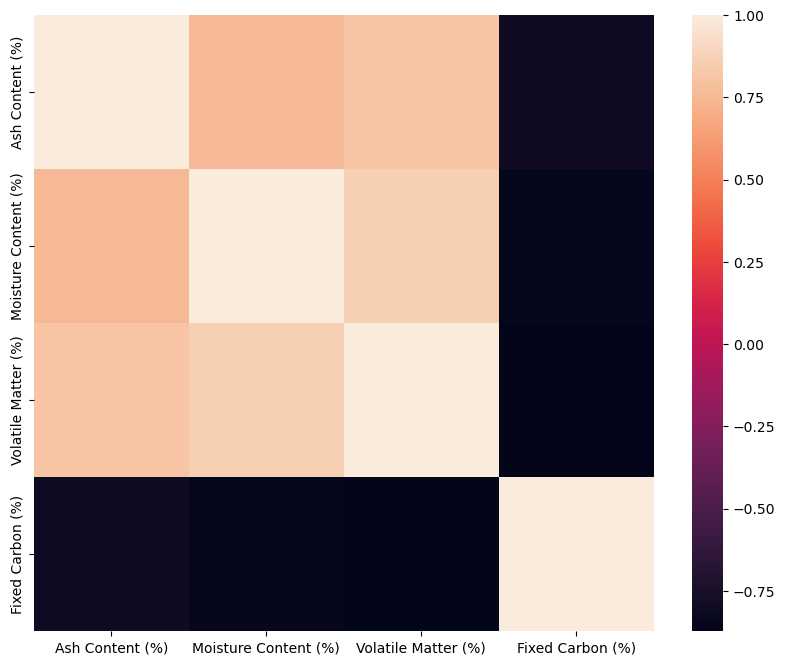

In [62]:
import matplotlib.pyplot as plt

corr = df.select_dtypes('number')[df.columns[:-1]].corr()


# Set figure size
plt.figure(figsize=(10, 8))  # Adjust the size as needed

sns.heatmap(corr)

# Save the plot
plt.savefig('plots/heatmap_2.png', dpi=900)  # Adjust dpi for high resolution

# Show the plot
plt.show()

In [54]:
import functools
import matplotlib.pyplot as plt

def save_plot(filename):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            # Call the original plotting function
            result = func(*args, **kwargs)

            # Save the plot
            plt.savefig(filename, dpi=300)  # Adjust dpi as needed

            # Show the plot
            plt.show()

            return result

        return wrapper
    return decorator


In [63]:
df.isnull().sum()

Ash Content (%)            0
Moisture Content (%)       0
Volatile Matter (%)        0
Fixed Carbon (%)           0
Calorific Value (MJ/Kg)    0
dtype: int64

In [64]:
target = df.columns[-1]
y = df[target]
X = df.drop(columns=target)



In [65]:
from sklearn.model_selection import train_test_split

# create a test split with 20% of test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create a validation split with 20% of val data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Example with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline, make_pipeline

# Build Model with a decision tree regression algorithm (avoid multi-collinearity effect from correlated features)
model = make_pipeline(
    # OrdinalEncoder(),
    StandardScaler(),
    DecisionTreeRegressor(max_depth=3, random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=3, random_state=42))])

In [68]:
from sklearn.metrics import *

y_pred_training = model.predict(X_train)

print("Training MAE:", mean_absolute_error(y_train, y_pred_training))
print("Training r2:", r2_score(y_train, y_pred_training))

Training MAE: 0.06429931972789125
Training r2: 0.9920340200312101


In [69]:
mae_train = mean_absolute_error(y_train, model.predict(X_train))
mae_test = mean_absolute_error(y_test, model.predict(X_test))
mae_val = mean_absolute_error(y_val, model.predict(X_val))
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
r2_val = r2_score(y_val, model.predict(X_val))

print("Training MAE:", round(mae_train, 2), "Train R2", round(r2_train,2))
print("Test MAE:", round(mae_test, 2), "Test R2", round(r2_test,2))
print("Val MAE:", round(mae_val, 2), "Val R2", round(r2_val,2))

Training MAE: 0.06 Train R2 0.99
Test MAE: 0.28 Test R2 0.89
Val MAE: 0.09 Val R2 0.99


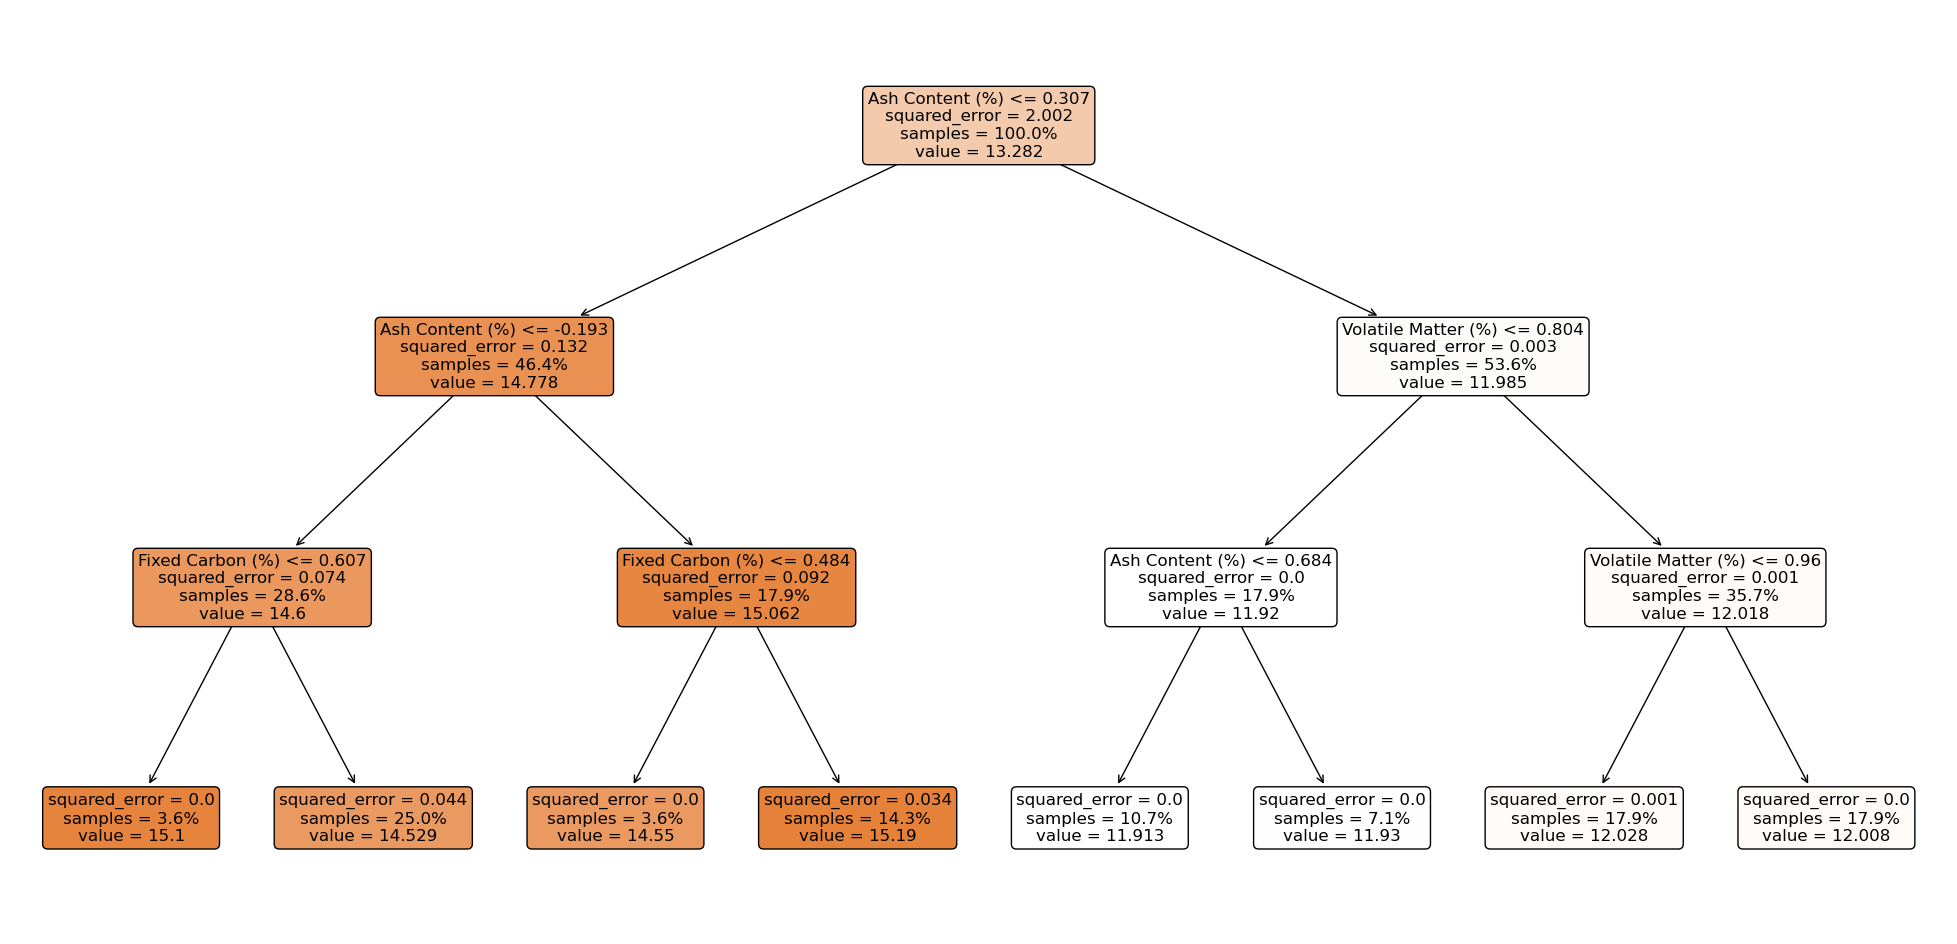

In [70]:
from sklearn.tree import plot_tree

@save_plot('plots/model_2.png')
def plot_model():
    # Create larger figure
    fig, ax = plt.subplots(figsize=(25, 12))
    # Plot tree
    plot_tree(
        decision_tree = model.named_steps["decisiontreeregressor"],
        feature_names=X_train.columns.to_list(),
        filled=True,  # Color leaf with class
        rounded=True,  # Round leaf edges
        proportion=True,  # Display proportion of classes in leaf
        max_depth=3,  # Only display first 3 levels
        fontsize=12,  # Enlarge font
        ax=ax,  # Place in figure axis
    );

plot_model()

In [71]:
# Extract feature importances
features = X_train.columns
importances = model.named_steps["decisiontreeregressor"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['Ash Content (%)', 'Moisture Content (%)', 'Volatile Matter (%)'], dtype='object')
Importances: [9.88375197e-01 0.00000000e+00 5.93702005e-04]


In [72]:
feat_imp = pd.Series(sorted(importances, reverse=False), index=features)
feat_imp.head()

Ash Content (%)         0.000000
Moisture Content (%)    0.000594
Volatile Matter (%)     0.011031
Fixed Carbon (%)        0.988375
dtype: float64

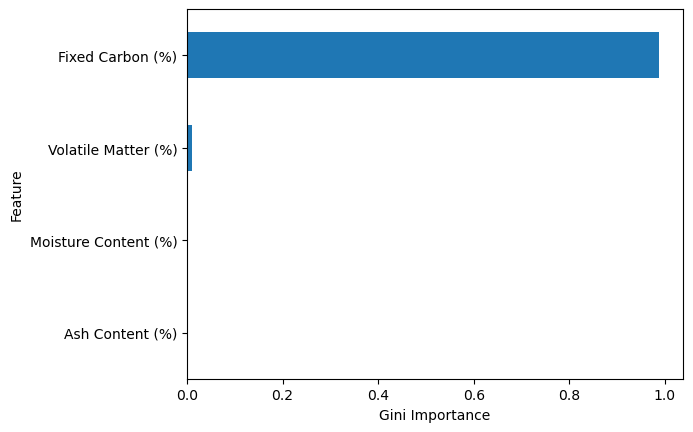

In [73]:
# Create horizontal bar chart
@save_plot("plots/fi_2")
def plot_fi():
    feat_imp.plot(kind="barh")
    plt.xlabel("Gini Importance")
    plt.ylabel("Feature")

plot_fi()

In [4]:
df_ = pd.read_excel("data/_2.xlsx")

df_.head()

,Ash Content (%),Moisture Content (%),Volatile (%),Fixed Carbon (%),Calorific Value (MJ/Kg)
0,13.00,10.9,67.28,19.72,12.00
1,12.86,11. 08,66.95,20.00,11.92
2,13.04,11.1,67.27,19.69,12.01
3,13.02,10.9,67.20,19.70,12.00
4,12.89,10. 92,66.97,20.00,11.90
